# Analiza danych ludzi mieszkających w Indiach

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
# Wczytanie pliku csv
df = pd.read_csv('C:/Users/PC/OneDrive/Pulpit/projects/Python_jupyter_notebook/sales.csv', encoding = 'unicode_escape')

In [48]:
# Sprawdzenie wymiaru naszego zbioru danych
df.shape

(11251, 15)

In [49]:
# Podgląd danych - 10 pierwszych wierszy
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
#Usunięcie pustych kolumn
df.drop(['Status','unnamed1'],axis=1, inplace = True)

In [52]:
#Sprawdzenie wartości "null" w zbiorze danych
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [53]:
#Usunięcie wartości "null" ze zbioru
df.dropna(inplace=True)

In [54]:
#Sprawdzenie
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [55]:
#Sprawdzenie ponownego wymiaru 
df.shape

(11239, 13)

In [56]:
#Zmiana typu danych dla zmiennej 'Amount' na postać liczby całkowitej

In [57]:
df['Amount'] = df['Amount'].astype('int')

In [58]:
df['Amount'].dtypes

dtype('int32')

In [59]:
#Podgląd wszystkich kolumn
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Eksploracyjna Analiza Danych

### Płeć

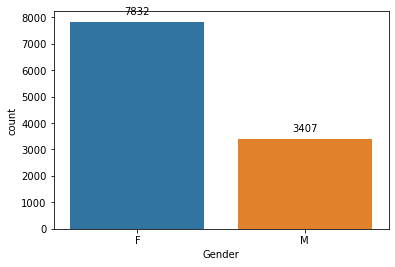

In [60]:
ax = sns.countplot(x = 'Gender', data = df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In [61]:
#Zliczenie ze względu na płeć
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

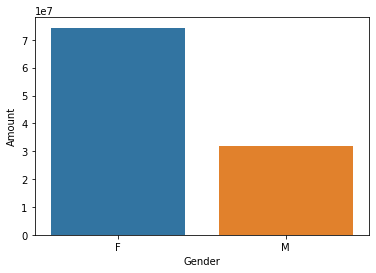

In [62]:
#Wizualizacja zliczeń ze względu na płeć
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender',y= 'Amount', data = sales_gen)                                                                               

#### Na przedstawionym powyżej wykresie, jesteśmy w stanie stwierdzić, iż najczęściej kupującymi osobami są kobiety.

### Wiek

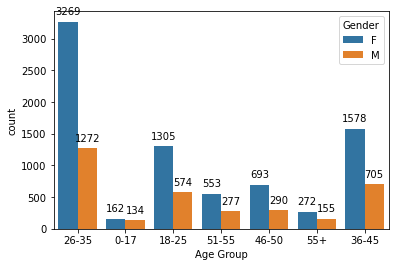

In [63]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


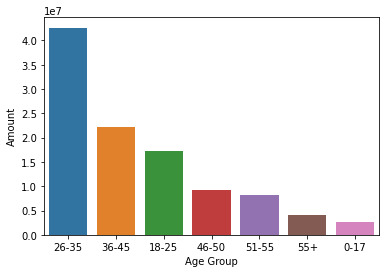

In [66]:
#Całkowita kwota vs grupy wiekowe
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

wykres = sns.barplot(x='Age Group', y='Amount',data= sales_age)



#### Na powyższym wykresie widzimy, iż najczęściej kupującymi osobami są kobiety w przedziale wiekowym 26-35.

### Stany

<AxesSubplot:xlabel='State', ylabel='Orders'>

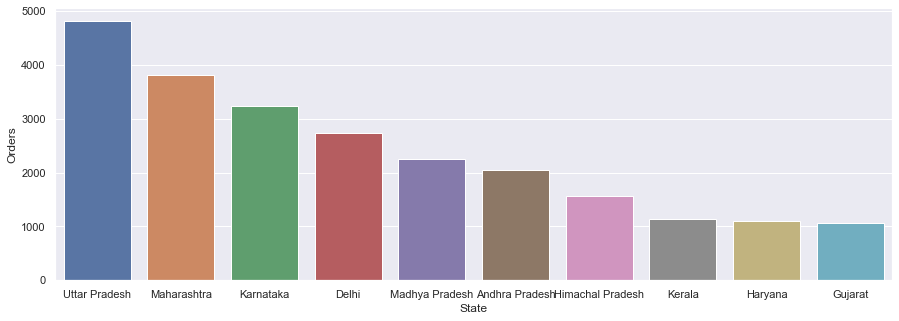

In [74]:
#Top 10 stanów pod względem ilości zamówień

order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= order_state, x='State', y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

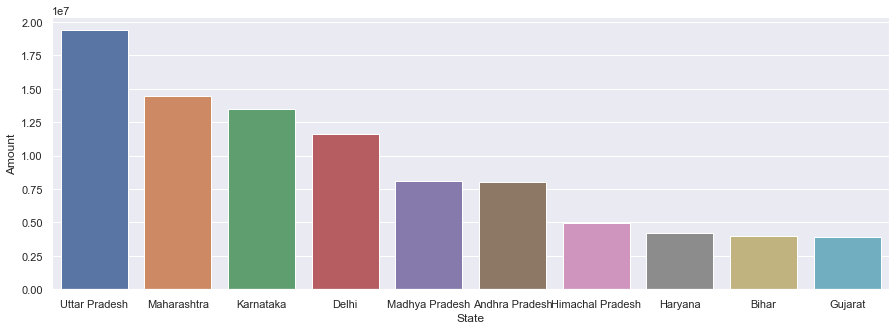

In [75]:
#Top 10 stanów pod względem ilości sprzedaży

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state, x='State', y='Amount')

#### Niepodważalnym dowodem z powyższych wykresów jest fakt, iż największą ilość sprzedaży oraz zamówień pochodzi ze stanu Uttar Pradesh, następnie ze stanu Maharashtra oraz Karnataka.

### Status ślubny

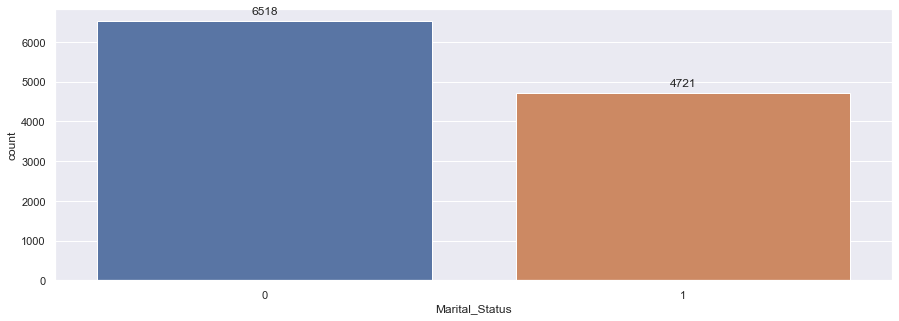

In [76]:
ax = sns.countplot(data=df, x='Marital_Status')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

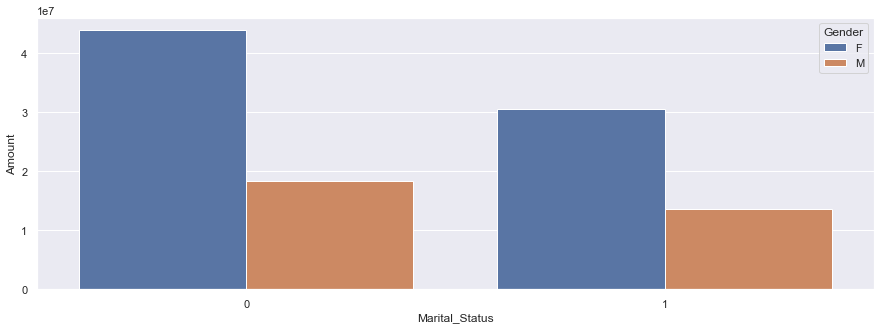

In [79]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

#### Stwierdzamy, że największymi kupującymi są kobiety po ślubie - mają wysoką siłę nabywczą.

### Zawód


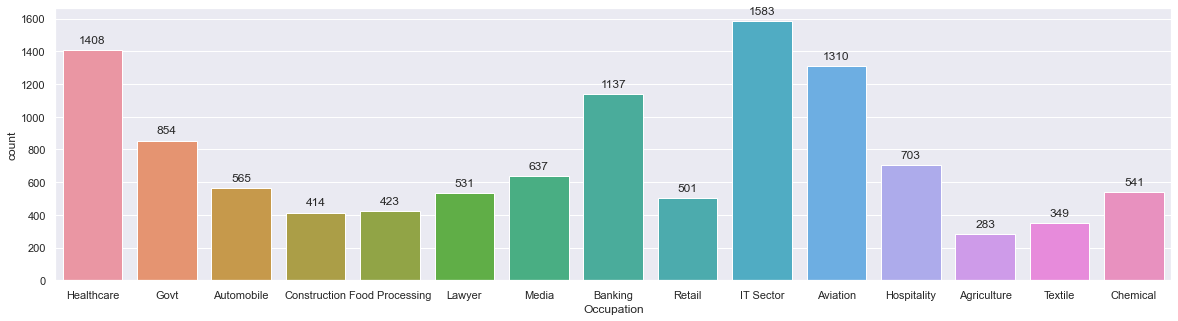

In [81]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df,x='Occupation')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

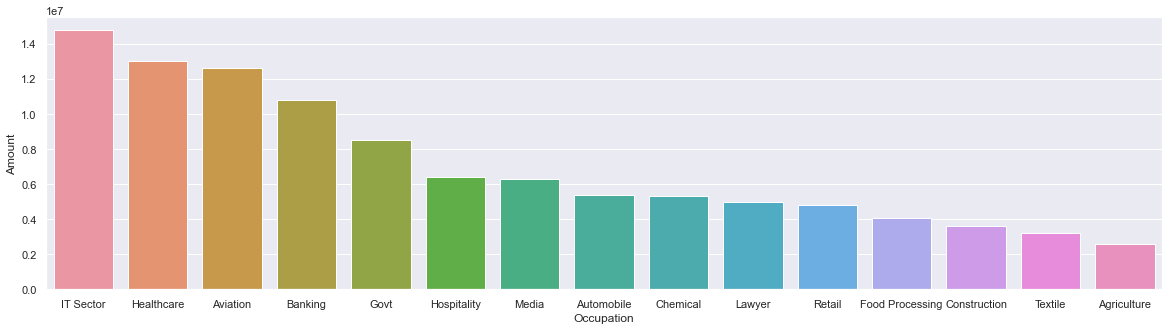

In [82]:
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

#### Największe liczby osób robiących zakupy wywodzą się z sektora IT, obieki zdrowotnej oraz lotnictwa.

### Kategoria produktu

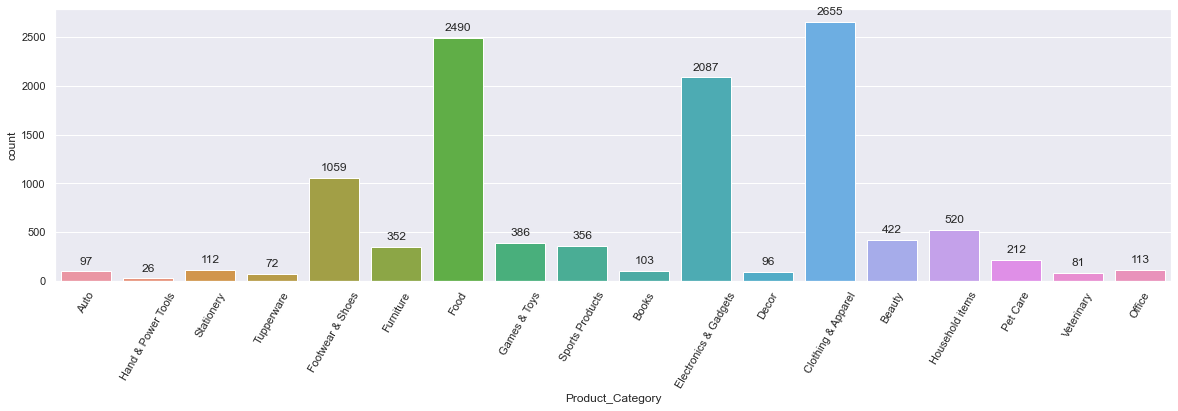

In [89]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df,x='Product_Category')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

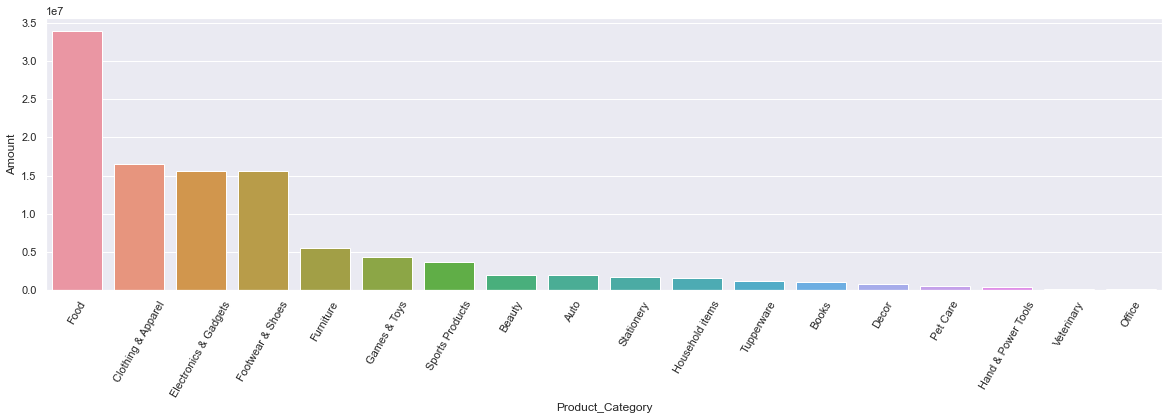

In [90]:
sales_state = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=sales_state,x='Product_Category',y='Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

#### Z powyższych wykresów stwierdzamy, że najczęściej kupowanym produktem jest żywność, ubrania i biżuteria oraz sprzęty elektroniczne.

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

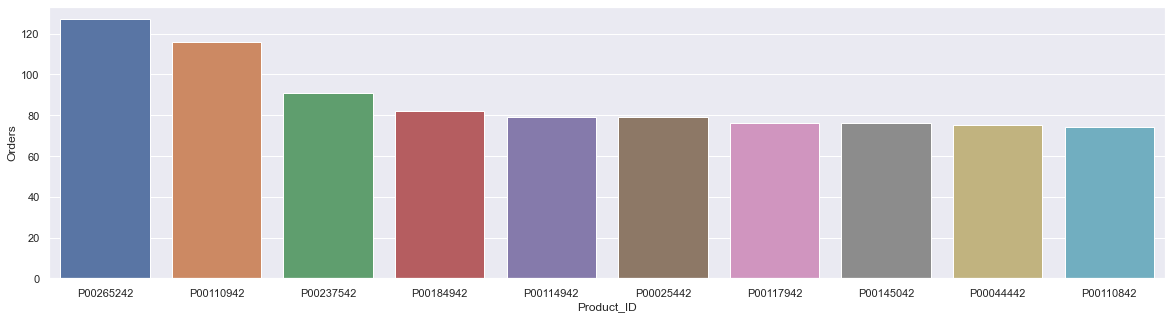

In [94]:
#Top 10 najczęściej sprzedawanych produktów po jego ID produktu

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x='Product_ID', y='Orders')

# Podsumowanie

#### Kobiety po ślubie w przedziale wiekowych 26 - 35 pochodzące między innymi z Uttar Pradesh, Maharastra oraz Karnataka pracujące w sektorze IT, opiece zdrowotnej oraz lotnictwie są skłonne do najczęstrzych zakupów produktów takich jak żywność, ubrania oraz sprzęty elektroniczne.

Opracował: Kwiek Kamil